#Load necessary packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import random
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#Data Sample

Image (#50): Which is digit '3'


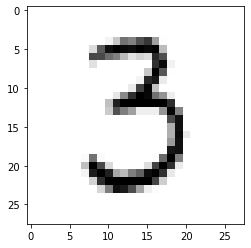

In [ ]:
digit = 50 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

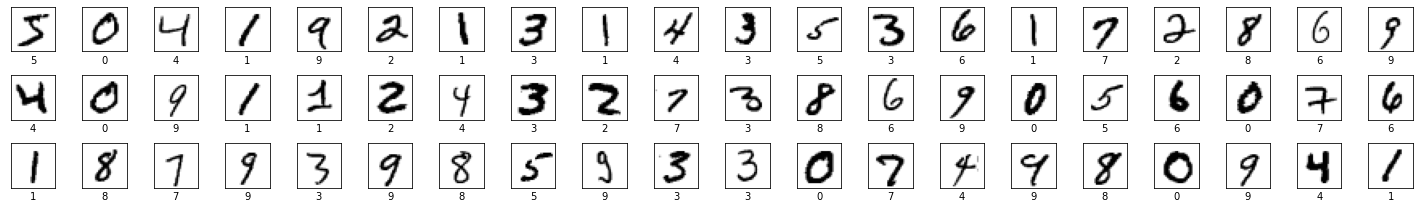

In [ ]:
Row = 3
Coloum = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(Row):
    for c in range(Coloum):
        plt.subplot(Row, Coloum, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

#Normalise data

In [ ]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

#CNN Model

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

#Compile The Model(SGD)

In [ ]:
    model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
 )

#Train The Model

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0654 - val_accuracy: 0.9818
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0623 - val_accuracy: 0.9830
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0469 - accuracy: 0.9864 - val_loss: 0.0688 - val_accuracy: 0.9812
Epoch 4/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0466 - accuracy: 0.9864 - val_loss: 0.0624 - val_accuracy: 0.9810
Epoch 5/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 0.0608 - val_accuracy: 0.9830


#Ploting the Training Result(SGD)

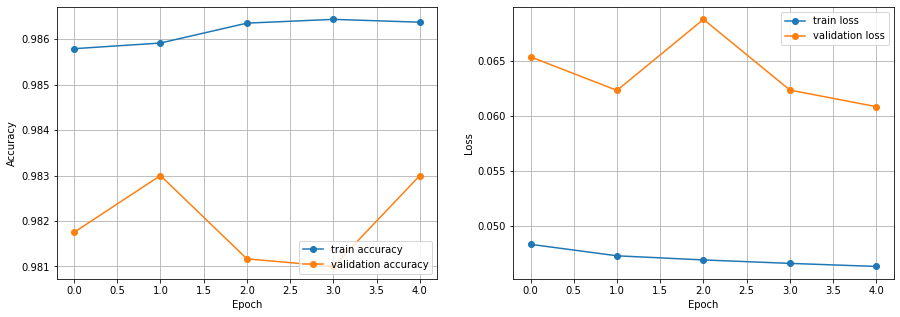

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


#Compile The Model(ADAM)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#Train The Model

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0705 - val_accuracy: 0.9786
Epoch 2/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0624 - val_accuracy: 0.9814
Epoch 3/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0589 - val_accuracy: 0.9822
Epoch 4/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 5/5
750/750 [==============================] - 37s 50ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0622 - val_accuracy: 0.9812


#Ploting the Training Result(ADAM)

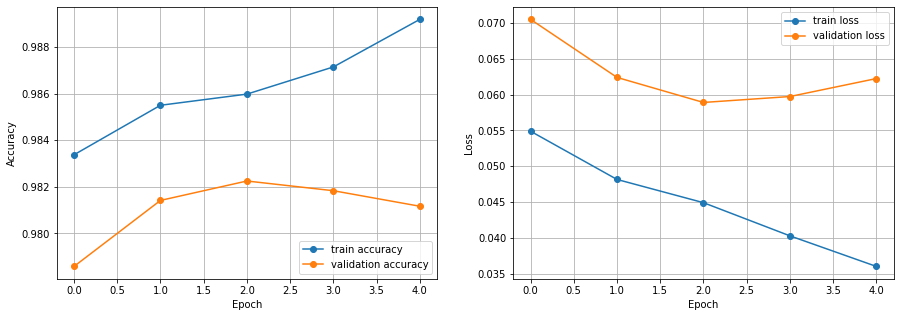

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


#Compile The Model(RMSProp)



In [ ]:
 model.compile(
     optimizer='rmsprop', 
     loss='sparse_categorical_crossentropy', 
     metrics=['accuracy']
 )

#Train The Model

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0578 - val_accuracy: 0.9846
Epoch 2/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0596 - val_accuracy: 0.9829
Epoch 3/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0572 - val_accuracy: 0.9844
Epoch 4/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 5/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0515 - val_accuracy: 0.9857


#Ploting the Training Result(RMSProp)

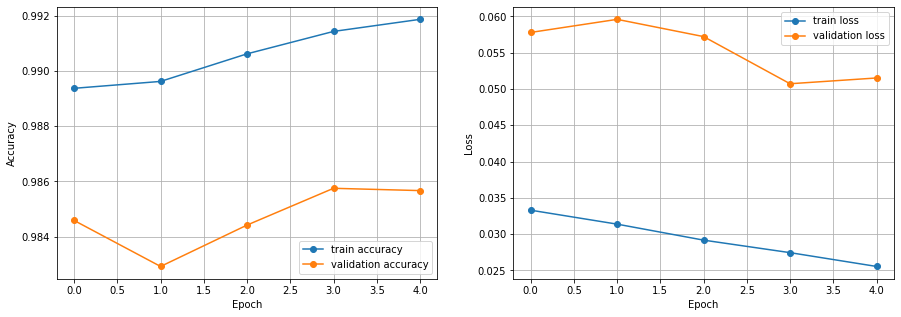

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#Model Evaluation

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0434 - accuracy: 0.9872

Test Accuracy: 0.9872000217437744

Test Loss: 0.04343126714229584
